# Intelligent Agents: Vacuum-cleaner World


## Instructions

Total Points: 10

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square is cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To starte, the agent is placed on a random square.

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
from numpy import random


def simple_randomized_agent(bumpers, dirty):
    actions = ['north', 'east', 'south', 'west', 'suck']
    return random.choice(actions)

In [2]:
simple_randomized_agent({"north" : True, "east" : False, "south" : False, "west" : True}, True)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

This simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns the performance measure which is here the number of cleaned squares (since all squares are constantly dirty, it is the number of `suck` actions by the agent). 

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: north
step 1 - action: west
step 2 - action: west
step 3 - action: north
step 4 - action: north
step 5 - action: south
step 6 - action: south
step 7 - action: suck
step 8 - action: north
step 9 - action: suck
step 10 - action: west
step 11 - action: suck
step 12 - action: east
step 13 - action: suck
step 14 - action: south
step 15 - action: east
step 16 - action: east
step 17 - action: south
step 18 - action: west
step 19 - action: north


4

# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can add additional Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. 

_Note:_ Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment [2 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment needs to work with the simple randomized agent program from above and then it can be used for your agent implementation in the tasks below.

In [55]:
# import random
# Your code and description goes here

# n - size of the grid
# chance_of_dirt inverse of the chance a square has dirt
def get_random_n_room(num_rows, num_cols, chance_of_dirt):
    room = []
    number_of_dirties = 0
    for row_num in range(0, num_rows):
        row = []
        for col_num in range(0, num_cols):
             # true represents dirt
            if random.randint(1, chance_of_dirt) == 1:
                row.append(True)
                number_of_dirties+=1
            else:
                row.append(False)
        room.append(row)
    return (room, number_of_dirties)

def is_room_clean(room):
    for row in range(0, len(room)):
        for col in range(0, len(room[row])):
            if room[row][col]:
                return False
    return True

    
def vacuum_environment(agent, max_steps, verbose = True, num_rows = 5, num_cols = 5, initial_position = (-1,-1)):
    room_and_num = get_random_n_room(num_rows, num_cols, 5)
    room = room_and_num[0]
    num_dirties = room_and_num[1]
    if initial_position[0] == -1:
        agent_row = random.randint(0, num_rows - 1)
    else:
        agent_row = initial_position[0]
    if initial_position[1] == -1:
        agent_col = random.randint(0, num_cols - 1)
    else:
        agent_col = initial_position[1]
    if verbose and False:
        print('Agents starting Position: (', agent_row, ' ', agent_col, ')')
        print('Room:')
        for i in range(0, len(room)):
            print(room[i])
    
            
    steps = 0
    for i in range(0, max_steps):
        bumpers = {"north": True, "south": True, "east": True, "west": True}
        bumpers['north'] = agent_row == 0
        bumpers['south'] = agent_row == num_rows-1
        bumpers['west'] = agent_col == 0
        bumpers['east'] = agent_col == num_cols-1
        
        action = agent(bumpers, room[agent_row][agent_col])
        steps += 1
        
        if action == 'suck' and room[agent_row][agent_col]:
            num_dirties-=1
            room[agent_row][agent_col] = False
        elif action == 'north':
            if agent_row > 0:
                agent_row -= 1
        elif action == 'south':
            if agent_row < num_rows-1:
                agent_row += 1
        elif action == 'west':
            if agent_col > 0:
                agent_col -= 1
        elif action == 'east':
            if agent_col < num_cols-1:
                agent_col += 1
        
        if verbose:
            print('step ', steps, ' - ', 'action: ', action, 'current pos: (', agent_row, ', ', agent_col, ')')
        
        if num_dirties == 0:
            if(verbose):
                print('Room is clean. To took ', steps, ' steps.')
                print('Room:')
                for i in range(0, len(room)):
                    print(room[i])
            return steps
    
    if(verbose): 
        print('Room is not clean. To took ', steps, ' steps.')
        if verbose:
            print('Room:')
            for i in range(0, len(room)):
                print(room[i])
    return steps
        


In [57]:
room_and = get_random_n_room(num_rows=5, num_cols=5, chance_of_dirt=5)
for row in room_and[0]:
    print(row)
print(room_and[1])

print(vacuum_environment(simple_randomized_agent, 2000, num_rows = 5, num_cols = 10))

[False, True, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[True, False, False, False, False]
[False, False, False, True, False]
3
step  1  -  action:  north current pos: ( 0 ,  8 )
step  2  -  action:  east current pos: ( 0 ,  9 )
step  3  -  action:  south current pos: ( 1 ,  9 )
step  4  -  action:  suck current pos: ( 1 ,  9 )
step  5  -  action:  south current pos: ( 2 ,  9 )
step  6  -  action:  suck current pos: ( 2 ,  9 )
step  7  -  action:  south current pos: ( 3 ,  9 )
step  8  -  action:  south current pos: ( 4 ,  9 )
step  9  -  action:  suck current pos: ( 4 ,  9 )
step  10  -  action:  north current pos: ( 3 ,  9 )
step  11  -  action:  east current pos: ( 3 ,  9 )
step  12  -  action:  west current pos: ( 3 ,  8 )
step  13  -  action:  suck current pos: ( 3 ,  8 )
step  14  -  action:  north current pos: ( 2 ,  8 )
step  15  -  action:  suck current pos: ( 2 ,  8 )
step  16  -  action:  west current pos: ( 2 ,  7 )
step  1

step  183  -  action:  east current pos: ( 3 ,  9 )
step  184  -  action:  west current pos: ( 3 ,  8 )
step  185  -  action:  east current pos: ( 3 ,  9 )
step  186  -  action:  north current pos: ( 2 ,  9 )
step  187  -  action:  north current pos: ( 1 ,  9 )
step  188  -  action:  suck current pos: ( 1 ,  9 )
step  189  -  action:  north current pos: ( 0 ,  9 )
step  190  -  action:  suck current pos: ( 0 ,  9 )
step  191  -  action:  north current pos: ( 0 ,  9 )
step  192  -  action:  south current pos: ( 1 ,  9 )
step  193  -  action:  west current pos: ( 1 ,  8 )
step  194  -  action:  east current pos: ( 1 ,  9 )
step  195  -  action:  west current pos: ( 1 ,  8 )
step  196  -  action:  west current pos: ( 1 ,  7 )
step  197  -  action:  suck current pos: ( 1 ,  7 )
step  198  -  action:  south current pos: ( 2 ,  7 )
step  199  -  action:  suck current pos: ( 2 ,  7 )
step  200  -  action:  suck current pos: ( 2 ,  7 )
step  201  -  action:  suck current pos: ( 2 ,  7 )
step  

step  402  -  action:  north current pos: ( 3 ,  2 )
step  403  -  action:  south current pos: ( 4 ,  2 )
step  404  -  action:  south current pos: ( 4 ,  2 )
step  405  -  action:  south current pos: ( 4 ,  2 )
step  406  -  action:  suck current pos: ( 4 ,  2 )
step  407  -  action:  north current pos: ( 3 ,  2 )
step  408  -  action:  south current pos: ( 4 ,  2 )
step  409  -  action:  west current pos: ( 4 ,  1 )
step  410  -  action:  east current pos: ( 4 ,  2 )
step  411  -  action:  east current pos: ( 4 ,  3 )
step  412  -  action:  east current pos: ( 4 ,  4 )
step  413  -  action:  suck current pos: ( 4 ,  4 )
step  414  -  action:  north current pos: ( 3 ,  4 )
step  415  -  action:  east current pos: ( 3 ,  5 )
step  416  -  action:  suck current pos: ( 3 ,  5 )
step  417  -  action:  south current pos: ( 4 ,  5 )
step  418  -  action:  east current pos: ( 4 ,  6 )
step  419  -  action:  south current pos: ( 4 ,  6 )
step  420  -  action:  suck current pos: ( 4 ,  6 )
ste

step  585  -  action:  west current pos: ( 3 ,  0 )
step  586  -  action:  east current pos: ( 3 ,  1 )
step  587  -  action:  south current pos: ( 4 ,  1 )
step  588  -  action:  east current pos: ( 4 ,  2 )
step  589  -  action:  west current pos: ( 4 ,  1 )
step  590  -  action:  east current pos: ( 4 ,  2 )
step  591  -  action:  suck current pos: ( 4 ,  2 )
step  592  -  action:  east current pos: ( 4 ,  3 )
step  593  -  action:  east current pos: ( 4 ,  4 )
step  594  -  action:  east current pos: ( 4 ,  5 )
step  595  -  action:  east current pos: ( 4 ,  6 )
step  596  -  action:  south current pos: ( 4 ,  6 )
step  597  -  action:  suck current pos: ( 4 ,  6 )
step  598  -  action:  south current pos: ( 4 ,  6 )
step  599  -  action:  east current pos: ( 4 ,  7 )
step  600  -  action:  suck current pos: ( 4 ,  7 )
step  601  -  action:  west current pos: ( 4 ,  6 )
step  602  -  action:  suck current pos: ( 4 ,  6 )
step  603  -  action:  north current pos: ( 3 ,  6 )
step  60

step  752  -  action:  south current pos: ( 4 ,  2 )
step  753  -  action:  west current pos: ( 4 ,  1 )
step  754  -  action:  suck current pos: ( 4 ,  1 )
step  755  -  action:  suck current pos: ( 4 ,  1 )
step  756  -  action:  south current pos: ( 4 ,  1 )
step  757  -  action:  north current pos: ( 3 ,  1 )
step  758  -  action:  east current pos: ( 3 ,  2 )
step  759  -  action:  west current pos: ( 3 ,  1 )
step  760  -  action:  south current pos: ( 4 ,  1 )
step  761  -  action:  suck current pos: ( 4 ,  1 )
step  762  -  action:  south current pos: ( 4 ,  1 )
step  763  -  action:  west current pos: ( 4 ,  0 )
step  764  -  action:  north current pos: ( 3 ,  0 )
step  765  -  action:  west current pos: ( 3 ,  0 )
step  766  -  action:  south current pos: ( 4 ,  0 )
step  767  -  action:  south current pos: ( 4 ,  0 )
step  768  -  action:  south current pos: ( 4 ,  0 )
step  769  -  action:  west current pos: ( 4 ,  0 )
step  770  -  action:  west current pos: ( 4 ,  0 )
ste

step  978  -  action:  west current pos: ( 1 ,  2 )
step  979  -  action:  north current pos: ( 0 ,  2 )
step  980  -  action:  north current pos: ( 0 ,  2 )
step  981  -  action:  north current pos: ( 0 ,  2 )
step  982  -  action:  west current pos: ( 0 ,  1 )
step  983  -  action:  north current pos: ( 0 ,  1 )
step  984  -  action:  east current pos: ( 0 ,  2 )
step  985  -  action:  suck current pos: ( 0 ,  2 )
step  986  -  action:  north current pos: ( 0 ,  2 )
step  987  -  action:  west current pos: ( 0 ,  1 )
step  988  -  action:  suck current pos: ( 0 ,  1 )
step  989  -  action:  suck current pos: ( 0 ,  1 )
step  990  -  action:  west current pos: ( 0 ,  0 )
step  991  -  action:  north current pos: ( 0 ,  0 )
step  992  -  action:  south current pos: ( 1 ,  0 )
step  993  -  action:  suck current pos: ( 1 ,  0 )
step  994  -  action:  north current pos: ( 0 ,  0 )
step  995  -  action:  south current pos: ( 1 ,  0 )
step  996  -  action:  south current pos: ( 2 ,  0 )
st

## Task 2:  Implement a simple reflex agent [1 Point] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

This agent will only suck when there is dirt in its square and it will only not run into the walls

In [58]:
# Your code and description goes here

# bumpers - list of booleans that indicate if a bumper is touching a wall
# dirty - boolean is whether or not the dirt sensor finds there is dirt in the current square
def simple_reflex_agent(bumpers, dirty):
    actions = []
    
    if dirty:
        actions.append('suck')
    if not bumpers['north']:
        actions.append('north')
    if not bumpers['south']:
        actions.append('south')
    if not bumpers['west']:
        actions.append('west')
    if not bumpers['east']:
        actions.append('east')
        
    return random.choice(actions)
    
    

In [59]:
vacuum_environment(simple_reflex_agent, 2000, verbose = False)

232

## Task 3: Implement a model-based reflex agent [3 Point]

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has. It can move to a corner to determin its location and then is able to use more advanced navigation.

_Note on implementing the state:_ You can use a global variable. In Python, you have to use the keyword `global` in your function for this to work (see: https://www.programiz.com/python-programming/global-keyword). Alternatively, you can define a class for your agent with a member variable for the state and a function for the agent program (see: https://www.w3schools.com/python/python_classes.asp). 

Describe how you define the __agent state__ and how your agent works before implementing it.

### Short Description 
* The agent will randomly will act in 4 phases
* 0: pick a direction 
* 1: Clean ever square and move that direction until a wall is hit. Once at a wall move in a perpindicular direction (keeping the same direction throughout this phase. Until we get to a corner
* 2: Walk up to the row or col we hit the first wall
* 3: continue a similar patter above until the room is finished

In [62]:
# Your code goes here
class Agent:
    def __init__(self, initial_position = (0,0), name = "An Agent"):
        self.position = initial_position
        self.name = name
        self.phase = 0
        self.dir = 'east'
        self.rows_in_phase_0 = 0
        self.num_cols = 1
        self.starting_row = None
        self.steps = 0
    
    def act(self, bumpers, dirty):
        self.steps += 1
        if dirty:
            return 'suck'
        elif self.phase == 0:
            if bumpers['south']: # count now long the wall is
                self.num_cols += 1
                
            if bumpers[self.dir] and bumpers['south'] and self.rows_in_phase_0 == 0:
                # this means we started on the bottom rows
                self.rows_in_phase_0 = 1
                if self.dir == 'west':
                    self.dir = 'east'
                else:
                    self.dir = 'west'
            if bumpers[self.dir] and bumpers['south'] and self.rows_in_phase_0 != 0: # in the corner
                self.dir = 'north'
                self.phase += 1
                return self.dir
            if bumpers[self.dir]: # we hit a wall
                self.rows_in_phase_0 += 1
                if self.dir == 'west':
                    self.dir = 'east'
                else:
                    self.dir = 'west'
                return 'south'
            else:
                return self.dir
        elif self.phase == 1:
            if self.rows_in_phase_0 > 1:
                self.rows_in_phase_0 -= 1
                return 'north'
            else: #reached starting row
                self.last_row_done = False
                self.phase += 1
                if bumpers['east']:
                    self.dir = 'west'
                    return 'west'
                else:
                    self.dir = 'east'
                    return 'east'
        elif self.phase == 2:
            if bumpers['north']:
                self.last_row_done = True
                
            if bumpers[self.dir] and not self.last_row_done:
                    
                if bumpers['east']:
                    self.dir = 'west'
                else:
                    self.dir = 'east'
                return 'north'
            if bumpers[self.dir] and self.last_row_done:
                return 'done'
            return self.dir
        else:
            print('all else failed ', self.dir)
            

In [74]:
agent = Agent()
print(vacuum_environment(agent.act, 200, num_rows=5, num_cols=10, verbose=False))

70


## Task 4: Simulation study [3 Points]
Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results in a suitable format (tables, graphs) and discuss the differences. 

Here is some help with [charts and tables.](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb

In [95]:

# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def simulate_cleaning_room(runs, rows_cols):
    performance = []
    
    for num_rows, num_cols in rows_cols:
        for i in range(runs):
            run = []
            max_steps = num_rows*num_cols*100
            steps = vacuum_environment(simple_randomized_agent,
                                       max_steps,
                                       verbose = False,
                                       num_rows=num_rows,
                                       num_cols = num_cols)
            run.append(i)
            run.append(num_rows)
            run.append(num_cols)
            run.append(steps)
            run.append('simple_randomized_agent')
            performance.append(run)
            
            steps = vacuum_environment(simple_reflex_agent,
                                       max_steps,
                                       verbose = False,
                                       num_rows=num_rows,
                                       num_cols = num_cols)
            run = []
            run.append(i)
            run.append(num_rows)
            run.append(num_cols)
            run.append(steps)
            run.append('simple_reflex_agent')
            performance.append(run)
            
            agent = Agent()
            steps = vacuum_environment(agent.act,
                                       max_steps,
                                       verbose = False,
                                       num_rows=num_rows,
                                       num_cols = num_cols)
            run = []
            run.append(i)
            run.append(num_rows)
            run.append(num_cols)
            run.append(steps)
            run.append('model_agent')
            performance.append(run)
            
    df = pd.DataFrame(performance, columns = ['index', 'rows', 'cols', 'steps', 'agent']) 
    return df

In [96]:
df_temp = simulate_cleaning_room(1, [(5,10)])
df_temp.groupby([df_temp.rows, df_temp.cols, df_temp.agent]).mean()

index  steps
rows cols agent                                
5    10   model_agent                  0     40
          simple_randomized_agent      0    703
          simple_reflex_agent          0    263

In [109]:

df = simulate_cleaning_room(50, [(5,5), (10,10), (100,100)])


In [110]:
print(df[df.steps == df.rows*df.cols*100].groupby(['rows','cols', 'agent']).count())
print(df)

                                   index  steps
rows cols agent                                
100  100  simple_randomized_agent      8      8
     index  rows  cols   steps                    agent
0        0     5     5     382  simple_randomized_agent
1        0     5     5     342      simple_reflex_agent
2        0     5     5      34              model_agent
3        1     5     5     564  simple_randomized_agent
4        1     5     5     403      simple_reflex_agent
..     ...   ...   ...     ...                      ...
445     48   100   100  588971      simple_reflex_agent
446     48   100   100   12606              model_agent
447     49   100   100  765650  simple_randomized_agent
448     49   100   100  522815      simple_reflex_agent
449     49   100   100   12640              model_agent

[450 rows x 5 columns]


In [137]:
df['rows_cols'] = df.rows.astype(str) + 'x' + df.cols.astype(str)
df_grouped = df.groupby(['rows_cols', 'agent'])
df_grouped.mean()

index   rows   cols      steps
rows_cols agent                                                  
100x100   model_agent               24.5  100.0  100.0   12587.10
          simple_randomized_agent   24.5  100.0  100.0  833669.14
          simple_reflex_agent       24.5  100.0  100.0  673989.98
10x10     model_agent               24.5   10.0   10.0     130.14
          simple_randomized_agent   24.5   10.0   10.0    3172.96
          simple_reflex_agent       24.5   10.0   10.0    2340.74
5x5       model_agent               24.5    5.0    5.0      29.52
          simple_randomized_agent   24.5    5.0    5.0     458.98
          simple_reflex_agent       24.5    5.0    5.0     317.16

C:\Users\nickl\.conda\envs\mlenv2020\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


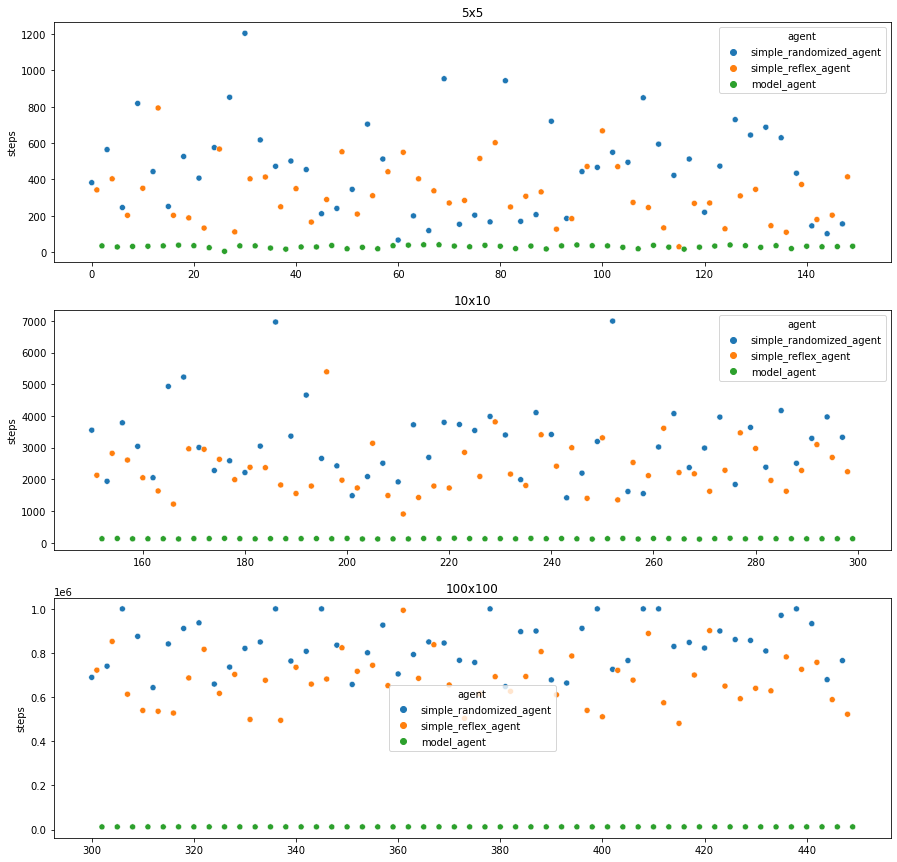

In [139]:
df['rows_cols'] = df.rows.astype(str) + 'x' + df.cols.astype(str)
fig, ax = plt.subplots(3,1,figsize=(15,15))

ax[0].title.set_text('5x5')
sns.scatterplot(x=df[df.rows_cols == '5x5'].index,
                y=df[df.rows_cols == '5x5'].steps,
                data = df[df.rows_cols == '5x5'],
                hue=df[df.rows_cols == '5x5'].agent,
                ax=ax[0])

ax[1].title.set_text('10x10')
sns.scatterplot(x=df[df.rows_cols == '10x10'].index,
                y=df[df.rows_cols == '10x10'].steps,
                data = df[df.rows_cols == '10x10'],
                hue=df[df.rows_cols == '10x10'].agent,
                ax=ax[1])

ax[2].title.set_text('100x100')
sns.scatterplot(x=df[df.rows_cols == '100x100'].index,
                y=df[df.rows_cols == '100x100'].steps,
                data = df[df.rows_cols == '100x100'],
                hue=df[df.rows_cols == '100x100'].agent,
                ax=ax[2])

fig.show()

In the $5\times 5$ example the perfromance is alomost close and there is even a case taht the simple reflex agent that performs as good as the model agent, this case probably just got lucky and started out next to the only dirty squares or moved to them very quickly. But as the room size increases the model agent out performs by a lot more. In the $100\times 100$ the model agent is always significantly better than the other agents.

#### Your discussion of the results goes here

## Task 5: Robustness of the agent implementations [1 Point] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

### Discussion
### If it is put into a rectangular room with unkonwn size
#### Simple Random
The Random agent will perform similarly to as it did in 
#### Simple Reflex Random
#### Model-based Reflex
The agent does not consider the size of the room in its cleaning. It will move east until it gets to the first wall, then it will clean each row until it gets to the bottom. Once it is in the corner it will clean the row it started on incase it did not start at the beginning of that row. Then it will clean each row moving up until it gets to the top corner. The worst case performance is if it starts in the west north most corner. Then the agent will clean that row, and move down cleaning each row and eventually walk the top row again. That means the agent will walk over at worst one row and one column twice. That means the different between a rectangle and a square will be the worst case of the rectangle will be the length + the width, which is only slightly different than the square case
### If the cleaning area can have an irregular shape:
#### Simple Random and Simple Reflex Random
These two random agents might have a tough time getting to other rooms if it was down a hallway or through a narrow door. This would cause it to spend all its time in one of the rooms and failing to get to another room to clean it before running out of battery. A slight improvement on this agent might be to understand what the rooms are and spend an equal amount of time in each room. But if that was the plan it is probably better to just build an agent that maps out a plan to clean each room.
#### Model-based Relfex
If there was an irregular shape the agent would have to be modeled differently. The current model relies on the room to be a square 

### Run the code agaisnt Rectangular rooms

In [140]:
df_rect = simulate_cleaning_room(2, [(5,10), (10,30), (50,100)])
df_rect['rows_cols'] = df_rect['rows'].astype(str) + 'x' + df_rect['cols'].astype(str)
df_rect.groupby([df_rect.rows_cols, df_rect.agent]).mean()

index  rows   cols     steps
rows_cols agent                                                
10x30     model_agent                0.5  10.0   30.0     386.0
          simple_randomized_agent    0.5  10.0   30.0   10165.0
          simple_reflex_agent        0.5  10.0   30.0    9502.0
50x100    model_agent                0.5  50.0  100.0    6330.0
          simple_randomized_agent    0.5  50.0  100.0  355784.5
          simple_reflex_agent        0.5  50.0  100.0  399310.0
5x10      model_agent                0.5   5.0   10.0      65.5
          simple_randomized_agent    0.5   5.0   10.0    1015.5
          simple_reflex_agent        0.5   5.0   10.0    1136.0

## Graduate student advanced task: Obstacles [1 Point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In this section I decided to modify the way the room is made. This time the wall or obstacle is represented by a 'o', a dirty square is 'd' and a clean square is a 's'. The environment will not allow the agent to walk into any square that is a 'o' whether it is a wall or a obstacle. This makes the room matrix a $(row+2) \times (col+2)$ matrix. Below is an example $10\times 10$

In [302]:
# Your code and discussion goes here

# Your code and description goes here

# n - size of the grid with wall tiles around the edge
# chance_of_dirt inverse of the chance a square has dirt
# chance_of_obstacles inverse of the chance a square has dirt
def get_random_n_room_obstacles(num_rows, num_cols, chance_of_dirt, chance_of_obstacles):
    room = []
    number_of_dirties = 0
    number_of_obstacles = 0
    
    wall_row = []
    for col_num in range(num_rows+2):
        wall_row.append('o')
    room.append(wall_row)
    
    for row_num in range(0, num_rows):
        row = []
        row.append('o')
        for col_num in range(0, num_cols):
            randy = random.randint(1, chance_of_dirt*chance_of_obstacles)
             # true represents dirt
            if 1 <= randy and randy <= chance_of_obstacles:
                row.append('d')
                number_of_dirties+=1
            elif chance_of_obstacles < randy and randy <= chance_of_dirt+chance_of_obstacles:
                row.append('o')
                number_of_obstacles+=1
            else:
                row.append('c')
        row.append('o')
        room.append(row)
    room.append(wall_row)
    return (room, number_of_dirties, number_of_obstacles)

    
def vacuum_environment_obstacles(agent, max_steps, verbose = True, num_rows = 5, num_cols = 5, initial_position = (-1,-1)):
    room_and_num = get_random_n_room_obstacles(num_rows, num_cols, 5, 10)
    room = room_and_num[0]
    num_dirties = room_and_num[1]
    if initial_position[0] == -1:
        agent_row = random.randint(1, num_rows - 2)
    else:
        agent_row = initial_position[0]
    if initial_position[1] == -1:
        agent_col = random.randint(1, num_cols - 2)
    else:
        agent_col = initial_position[1]
    if verbose:
        print('Agents starting Position: (', agent_row, ' ', agent_col, ')')
        print('Room:')
        for i in range(0, len(room)):
            print(room[i])
    
            
    steps = 0
    for i in range(0, max_steps):
        bumpers = {"north": True, "south": True, "east": True, "west": True}
        # The bumpers will be on if it is a wall or a object
        bumpers['north'] = room[agent_row-1][agent_col] == 'o'
        bumpers['south'] = room[agent_row+1][agent_col] == 'o'
        bumpers['west'] = room[agent_row][agent_col-1] == 'o'
        bumpers['east'] = room[agent_row][agent_col+1] == 'o'
        
        action = agent(bumpers, room[agent_row][agent_col])
        steps += 1
        
        if action == 'suck' and room[agent_row][agent_col] == 'd':
            num_dirties-=1
            room[agent_row][agent_col] = 'c'
        elif action == 'south':
            if not bumpers['south']:
                agent_row += 1
        elif action == 'north':
            if not bumpers['north']:
                agent_row -= 1
        elif action == 'west':
            if not bumpers['west']:
                agent_col -= 1
        elif action == 'east':
            if not bumpers['east']:
                agent_col += 1
        
        if verbose:
            print('step ', steps, ' - ', 'action: ', action, 'current pos: (', agent_row, ', ', agent_col, ')')
        
        if num_dirties == 0:
            if(verbose):
                print('Room is clean. To took ', steps, ' steps.')
                print('Room:')
                for i in range(0, len(room)):
                    print(room[i])
            return steps
    
    if(verbose): 
        print('Room is not clean. To took ', steps, ' steps.')
        if verbose:
            print('Room:')
        for i in range(0, len(room)):
            print(room[i])
    return steps
        


In [303]:
#room = get_random_n_room_obstacles(num_rows = 10, num_cols = 10, chance_of_dirt = 5, chance_of_obstacles=10)
#print('Dirties:', room[1], 'Obstacles:', room[2])
#for row in room[0]:
#    print(row)
agent = Agent()
vacuum_environment_obstacles(agent.act, 250000, num_rows = 5, num_cols = 5, verbose = False)

250000

In [309]:
def simulate_cleaning_room_obstacles(runs, rows_cols, drity_chance, obstacle_chance):
    performance = []
    
    for num_rows, num_cols in rows_cols:
        for i in range(runs):
            run = []
            max_steps = num_rows*num_cols*100
            steps = vacuum_environment_obstacles(simple_randomized_agent,
                                       max_steps,
                                       verbose = False,
                                       num_rows=num_rows,
                                       num_cols = num_cols)
            run.append(num_rows)
            run.append(num_cols)
            run.append(steps)
            run.append('simple_randomized_agent')
            performance.append(run)
            
            steps = vacuum_environment_obstacles(simple_reflex_agent,
                                       max_steps,
                                       verbose = False,
                                       num_rows=num_rows,
                                       num_cols = num_cols)
            run = []
            run.append(num_rows)
            run.append(num_cols)
            run.append(steps)
            run.append('simple_reflex_agent')
            performance.append(run)
            
            agent = Agent()
            steps = vacuum_environment_obstacles(agent.act,
                                       max_steps,
                                       verbose = False,
                                       num_rows=num_rows,
                                       num_cols = num_cols)
            run = []
            run.append(num_rows)
            run.append(num_cols)
            run.append(steps)
            run.append('model_agent')
            performance.append(run)
            
    df = pd.DataFrame(performance, columns = ['rows', 'cols', 'steps', 'agent']) 
    return df

###############################################################################################
df_obs = simulate_cleaning_room_obstacles(10, [(5,5), (10, 10), (100,100)], 5, 5)

In [313]:

df_obs.groupby([df.rows, df.cols, df.agent]).mean()

rows   cols      steps
rows cols agent                                           
5    5    model_agent                5.0    5.0     2500.0
          simple_randomized_agent    5.0    5.0      401.9
          simple_reflex_agent        5.0    5.0      457.9
10   10   model_agent               10.0   10.0    10000.0
          simple_randomized_agent   10.0   10.0     3594.3
          simple_reflex_agent       10.0   10.0     3258.0
100  100  model_agent              100.0  100.0  1000000.0
          simple_randomized_agent  100.0  100.0   923755.1
          simple_reflex_agent      100.0  100.0   787769.2

## More advanced tasks to think about

You can think about these:

* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.

* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!

In [ ]:
# Your ideas/code